# Vehicle Insurance Interest Response Classification

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

## Problem Statement 

**An insurance company has provided Health Insurance to its customers now they want a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.**

## Data

|Variable|Definition|
|-----|-----|
|id	|Unique ID for the customer|
|Gender	|Gender of the customer|
|Age	|Age of the customer|
|Driving_License	|0 : Customer does not have DL, 1 : Customer already has DL|
|Region_Code	|Unique code for the region of the customer|
|Previously_Insured	|1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance|
|Vehicle_Age	|Age of the Vehicle|
|Vehicle_Damage	|1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.|
|Annual_Premium	|The amount customer needs to pay as premium in the year|
|PolicySalesChannel	|Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.|
|Vintage	|Number of Days, Customer has been associated with the company|
|Response	|1 : Customer is interested, 0 : Customer is not interested|

## Import libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report
from sklearn.utils import resample,shuffle

## Read the data

In [6]:
data = pd.read_csv('../data/data.csv')

In [7]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## Summary of the data


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [81]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## Get a count of the target variable and note down your observations

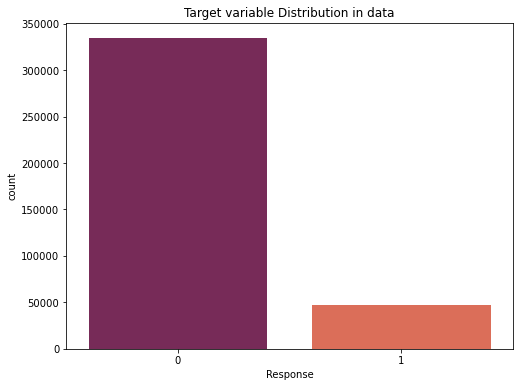

In [82]:
sns.countplot(data['Response'],palette='rocket')
plt.title("Target variable Distribution in data");

* So our data is highly imbalanced data

## What is the ratio of male and female in our dataset?

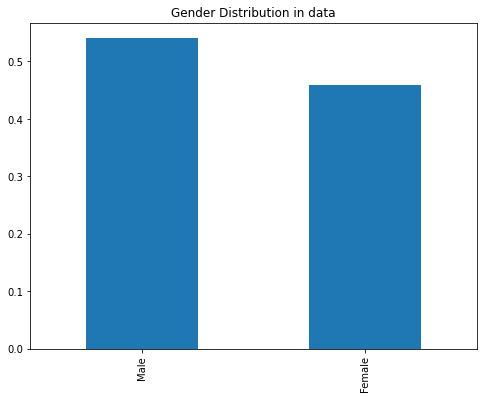

In [83]:
data['Gender'].value_counts(normalize = True).plot(kind = 'bar')

plt.title("Gender Distribution in data")

plt.show()

**The ratio of male and female customers in our data is fairly equal.**

## Check the gender ratio in the interested customers, what are your observations?

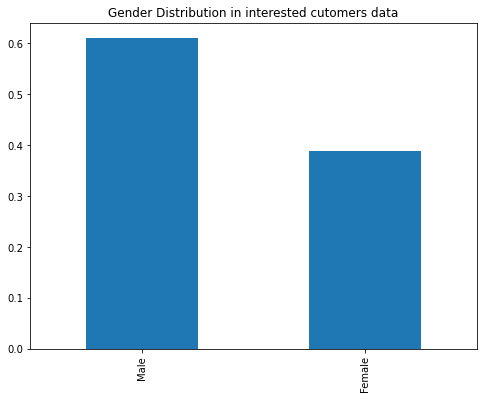

In [84]:
interested_customers = data[data['Response'] == 1]

interested_customers['Gender'].value_counts(normalize = True).plot(kind = 'bar')

plt.title("Gender Distribution in interested cutomers data")

plt.show()

**The ratio in intersted customers is slightly different though, here slightly less than 40 % customers are female and rest are male.**

## Find out the distribution of customers age

Age distribution according to Response


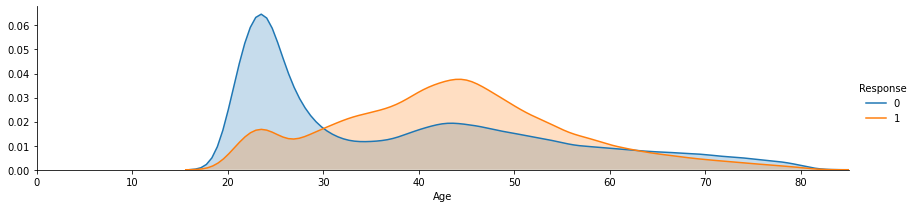

In [85]:
print("Age distribution according to Response")
facetgrid = sns.FacetGrid(data,hue="Response",aspect = 4)
facetgrid.map(sns.kdeplot,"Age",shade = True)
facetgrid.set(xlim = (0,data["Age"].max()))
facetgrid.add_legend()
plt.show()

* Young people below 30 are not interested in vehicle insurance. Reasons could be lack of experience, less maturity level and they don't have expensive vehicles yet.

* People aged between 30-60 are more likely to be interested.

## Which regions have people applied from more?

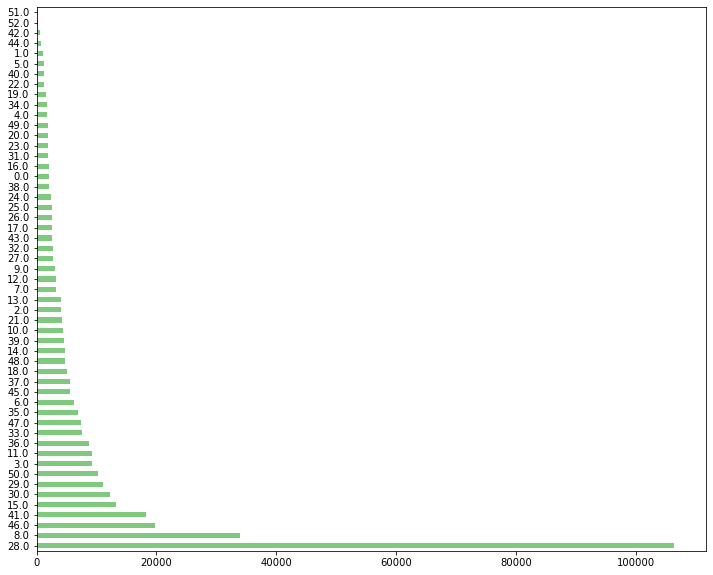

In [86]:
data['Region_Code'].value_counts().plot(kind='barh',cmap='Accent',figsize=(12,10))

plt.show()

## Check the ratio of previously insured, note down your observations

In [87]:
pd.crosstab(data['Response'], data['Previously_Insured'])

Previously_Insured,0,1
Response,,
0,159929,174470
1,46552,158


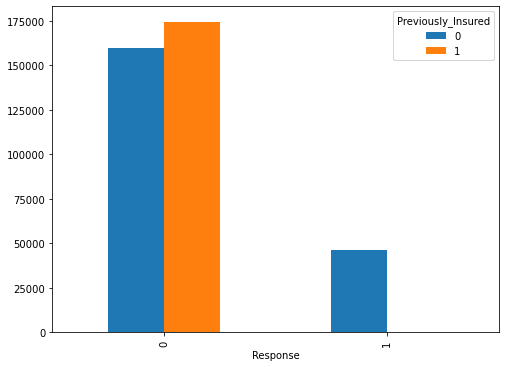

In [88]:
pd.crosstab(data['Response'], data['Previously_Insured']).plot(kind='bar')

plt.show()

Those who already have an insurance are not interested. This was obvious man!

## How old are most of the vehicles? Does vehicle damage has any effect on the Response variable?

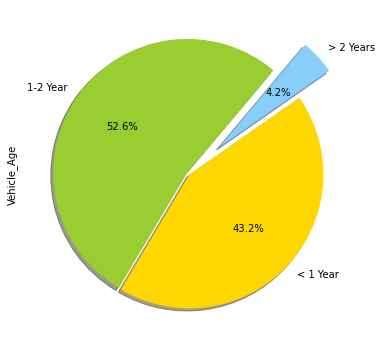

In [89]:
plt.rcParams['figure.figsize']=(6,8)
color = ['yellowgreen','gold',"lightskyblue"]
data['Vehicle_Age'].value_counts().plot.pie(y="Vehicle_Age",colors=color,explode=(0.02,0,0.3),startangle=50,shadow=True,autopct="%0.1f%%")
plt.axis('on');

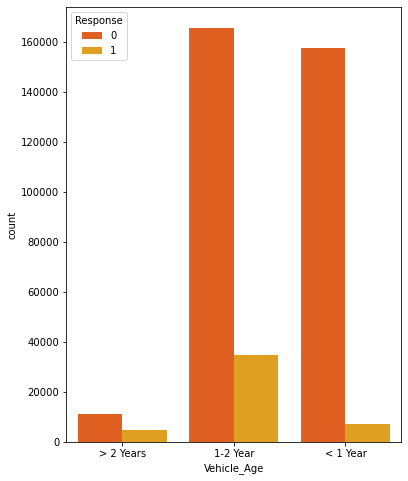

In [90]:
sns.countplot(data['Vehicle_Age'],hue=data['Response'],palette='autumn');


* More than half of the data (52%) has samples with vehicle age between 1-2 years.
* We can't say from second graph that people with vehicle age between 1-2 years are more interested because other category '>2 years' has very few observations.

In [ ]:
pd.crosstab(train_eda['Response'], train_eda['Vehicle_Damage']).plot(kind='bar');

* Customers who got his/her vehicle damaged in the past is more likely to be interested in insurance. May be because they have first-hand experience of its pros and cons.


## Plot a correlation matrix, remove the two least correlated features


Correlation matrix-


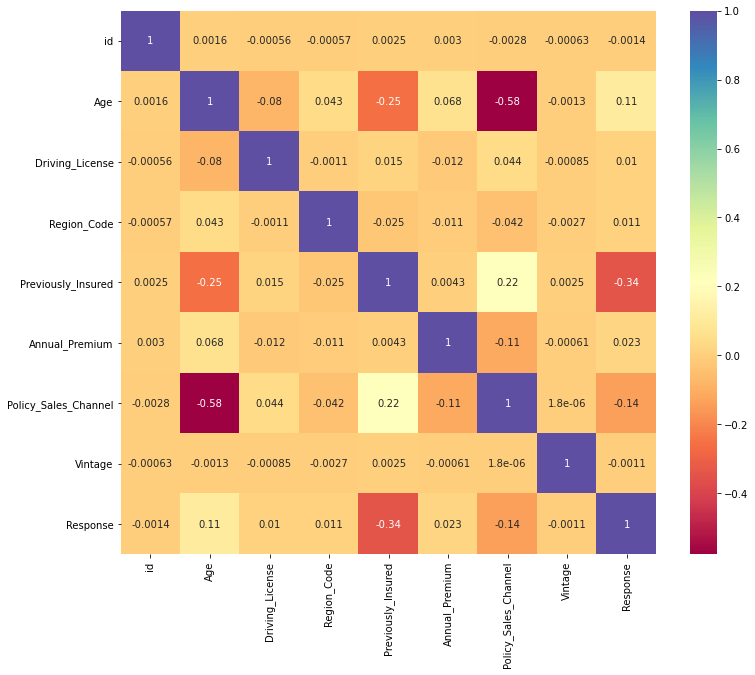

In [91]:
plt.figure(figsize=(12,10))
print("Correlation matrix-")
plt.rcParams['figure.figsize']=(8,6)
sns.heatmap(data.corr(),cmap='Spectral',annot = True)

In [92]:
data.corr()['Response'].sort_values()

Previously_Insured     -0.341170
Policy_Sales_Channel   -0.139042
id                     -0.001368
Vintage                -0.001050
Driving_License         0.010155
Region_Code             0.010570
Annual_Premium          0.022575
Age                     0.111147
Response                1.000000
Name: Response, dtype: float64

In [93]:
#creating a checkpoint
df_model = data.copy()
#dropping Vintage and id columns as suggested by EDA
df_model.drop(['id','Vintage'],axis=1,inplace=True)
#checking target variable
df_model.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

To make this data balanced let's upsample the minority class using sklearn library resample.



## Split the data into train and test, to avoid data leakage

In [94]:
# predictors
X = df_model.drop(['Response'], axis = 1)

# target variables
y = df_model['Response']

# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

## One Hot Encoding the categorical variables

In [95]:
train = pd.get_dummies(data = X_train,columns=['Gender','Vehicle_Damage','Vehicle_Age'],drop_first = True)

test = pd.get_dummies(data = X_test,columns=['Gender','Vehicle_Damage','Vehicle_Age'],drop_first = True)

## Lets fit a base model of Logistic regression, calculate accuracy, auc_roc score and print classification report.

## What are your observations? Are the results satisfactory?

In [1]:
# initialize the logistic regression model
logisticRegression = LogisticRegression()

# fit the data
logisticRegression.fit(train, y_train)

# find out the predictions
predictions = logisticRegression.predict(test)

# print accuracy and auc_roc score
print(f"Accuracy score is {100*accuracy_score(y_test,predictions).round(2)}\nROC-AUC score is {100*roc_auc_score(y_test,predictions).round(2)}")

# logisticRegression.score(y_test,predictions)

In [2]:
print(classification_report(y_test,predictions))

## Let us upsample the class with less data so that our model can learn about the minority class

In [53]:
#combining train features and target
df = pd.concat([train,y_train],axis=1)

# separating the two classes
df_majority = df[df['Response']==0]
df_minority = df[df['Response']==1]

# upsample the minority class
df_minority_upsampled = resample(df_minority,replace=True,n_samples=y_train.value_counts()[0],random_state = 123)

# Combine the two class data and check for the valu counts of each class
balanced_df = pd.concat([df_minority_upsampled,df_majority])
balanced_df = shuffle(balanced_df)
balanced_df.Response.value_counts()

1    267700
0    267700
Name: Response, dtype: int64

## Split the predictors and the target variables

In [54]:
X_train = balanced_df.drop('Response',1)
y_train = balanced_df['Response']

## Again fit a logistic regression model, find accuracy, auc_roc score and observe the results, have they improved?
## What are your observations?

In [3]:
# fit the model
logisticRegression.fit(X_train, y_train)

# predict values
predictions = logisticRegression.predict(test)

# printing the accuracy and auc_roc score
print(f"Accuracy score is {100*accuracy_score(y_test,predictions).round(2)}\nROC-AUC score is {100*roc_auc_score(y_test,predictions).round(2)}")

In [4]:
# printing the classification report
print(classification_report(y_test,predictions))

## Activity : Obviously.Ai demonstration